In [1]:
import pandas as pd

In [337]:
df = pd.read_csv('train.csv')

In [338]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [340]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891,891,891,891,891,714,891,891,891,891,204,889
unique,nan,nan,nan,891,2,nan,nan,nan,681,nan,147,3
top,nan,nan,nan,"Dowdell, Miss. Elizabeth",male,nan,nan,nan,1601,nan,G6,S
freq,nan,nan,nan,1,577,nan,nan,nan,7,nan,4,644
mean,446,0,2,NaN,NaN,30,1,0,NaN,32,NaN,NaN
std,257,0,1,NaN,NaN,15,1,1,NaN,50,NaN,NaN
min,1,0,1,NaN,NaN,0,0,0,NaN,0,NaN,NaN
25%,224,0,2,NaN,NaN,20,0,0,NaN,8,NaN,NaN
50%,446,0,3,NaN,NaN,28,0,0,NaN,14,NaN,NaN
75%,668,1,3,NaN,NaN,38,1,0,NaN,31,NaN,NaN


In [341]:
#df.drop(['PassengerId'],axis=1,inplace=True)
df['Age']=df['Age'].fillna(0.0).astype(int)
df['age_bkt']=df['Age'].apply(lambda x: "0" if x==0 else ("1" if x<15 else ("2" if x<30 else ("3" if x<45 else ("4" if x<60 else "5"))))) 

In [342]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bkt
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,8,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S,3


In [343]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [344]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bkt
0,1,0,3,male,22,1,0,7,S,2
1,2,1,1,female,38,1,0,71,C,3
2,3,1,3,female,26,0,0,8,S,2
3,4,1,1,female,35,1,0,53,S,3
4,5,0,3,male,35,0,0,8,S,3


In [345]:
new_df = pd.get_dummies(df,drop_first=True)

In [346]:
new_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,age_bkt_1,age_bkt_2,age_bkt_3,age_bkt_4,age_bkt_5
0,1,0,3,22,1,0,7,1,0,1,0,1,0,0,0
1,2,1,1,38,1,0,71,0,0,0,0,0,1,0,0
2,3,1,3,26,0,0,8,0,0,1,0,1,0,0,0
3,4,1,1,35,1,0,53,0,0,1,0,0,1,0,0
4,5,0,3,35,0,0,8,1,0,1,0,0,1,0,0


In [347]:
new_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,age_bkt_1,age_bkt_2,age_bkt_3,age_bkt_4,age_bkt_5
PassengerId,1,-0,-0,0,-0,-0,0,0,-0,0,-0,-0,0,0,0
Survived,-0,1,-0,0,-0,0,0,-1,0,-0,0,-0,0,0,-0
Pclass,-0,-0,1,-0,0,0,-1,0,0,0,0,0,-0,-0,-0
Age,0,0,-0,1,-0,-0,0,0,-0,0,-0,-0,0,1,0
SibSp,-0,-0,0,-0,1,0,0,-0,-0,0,0,-0,-0,-0,-0
Parch,-0,0,0,-0,0,1,0,-0,-0,0,0,-0,0,-0,-0
Fare,0,0,-1,0,0,0,1,-0,-0,-0,-0,-0,0,0,0
Sex_male,0,-1,0,0,-0,-0,-0,1,-0,0,-0,-0,-0,-0,0
Embarked_Q,-0,0,0,-0,-0,-0,-0,-0,1,-0,-0,-0,-0,-0,-0
Embarked_S,0,-0,0,0,0,0,-0,0,-0,1,0,0,0,0,-0


In [348]:
import seaborn as sns

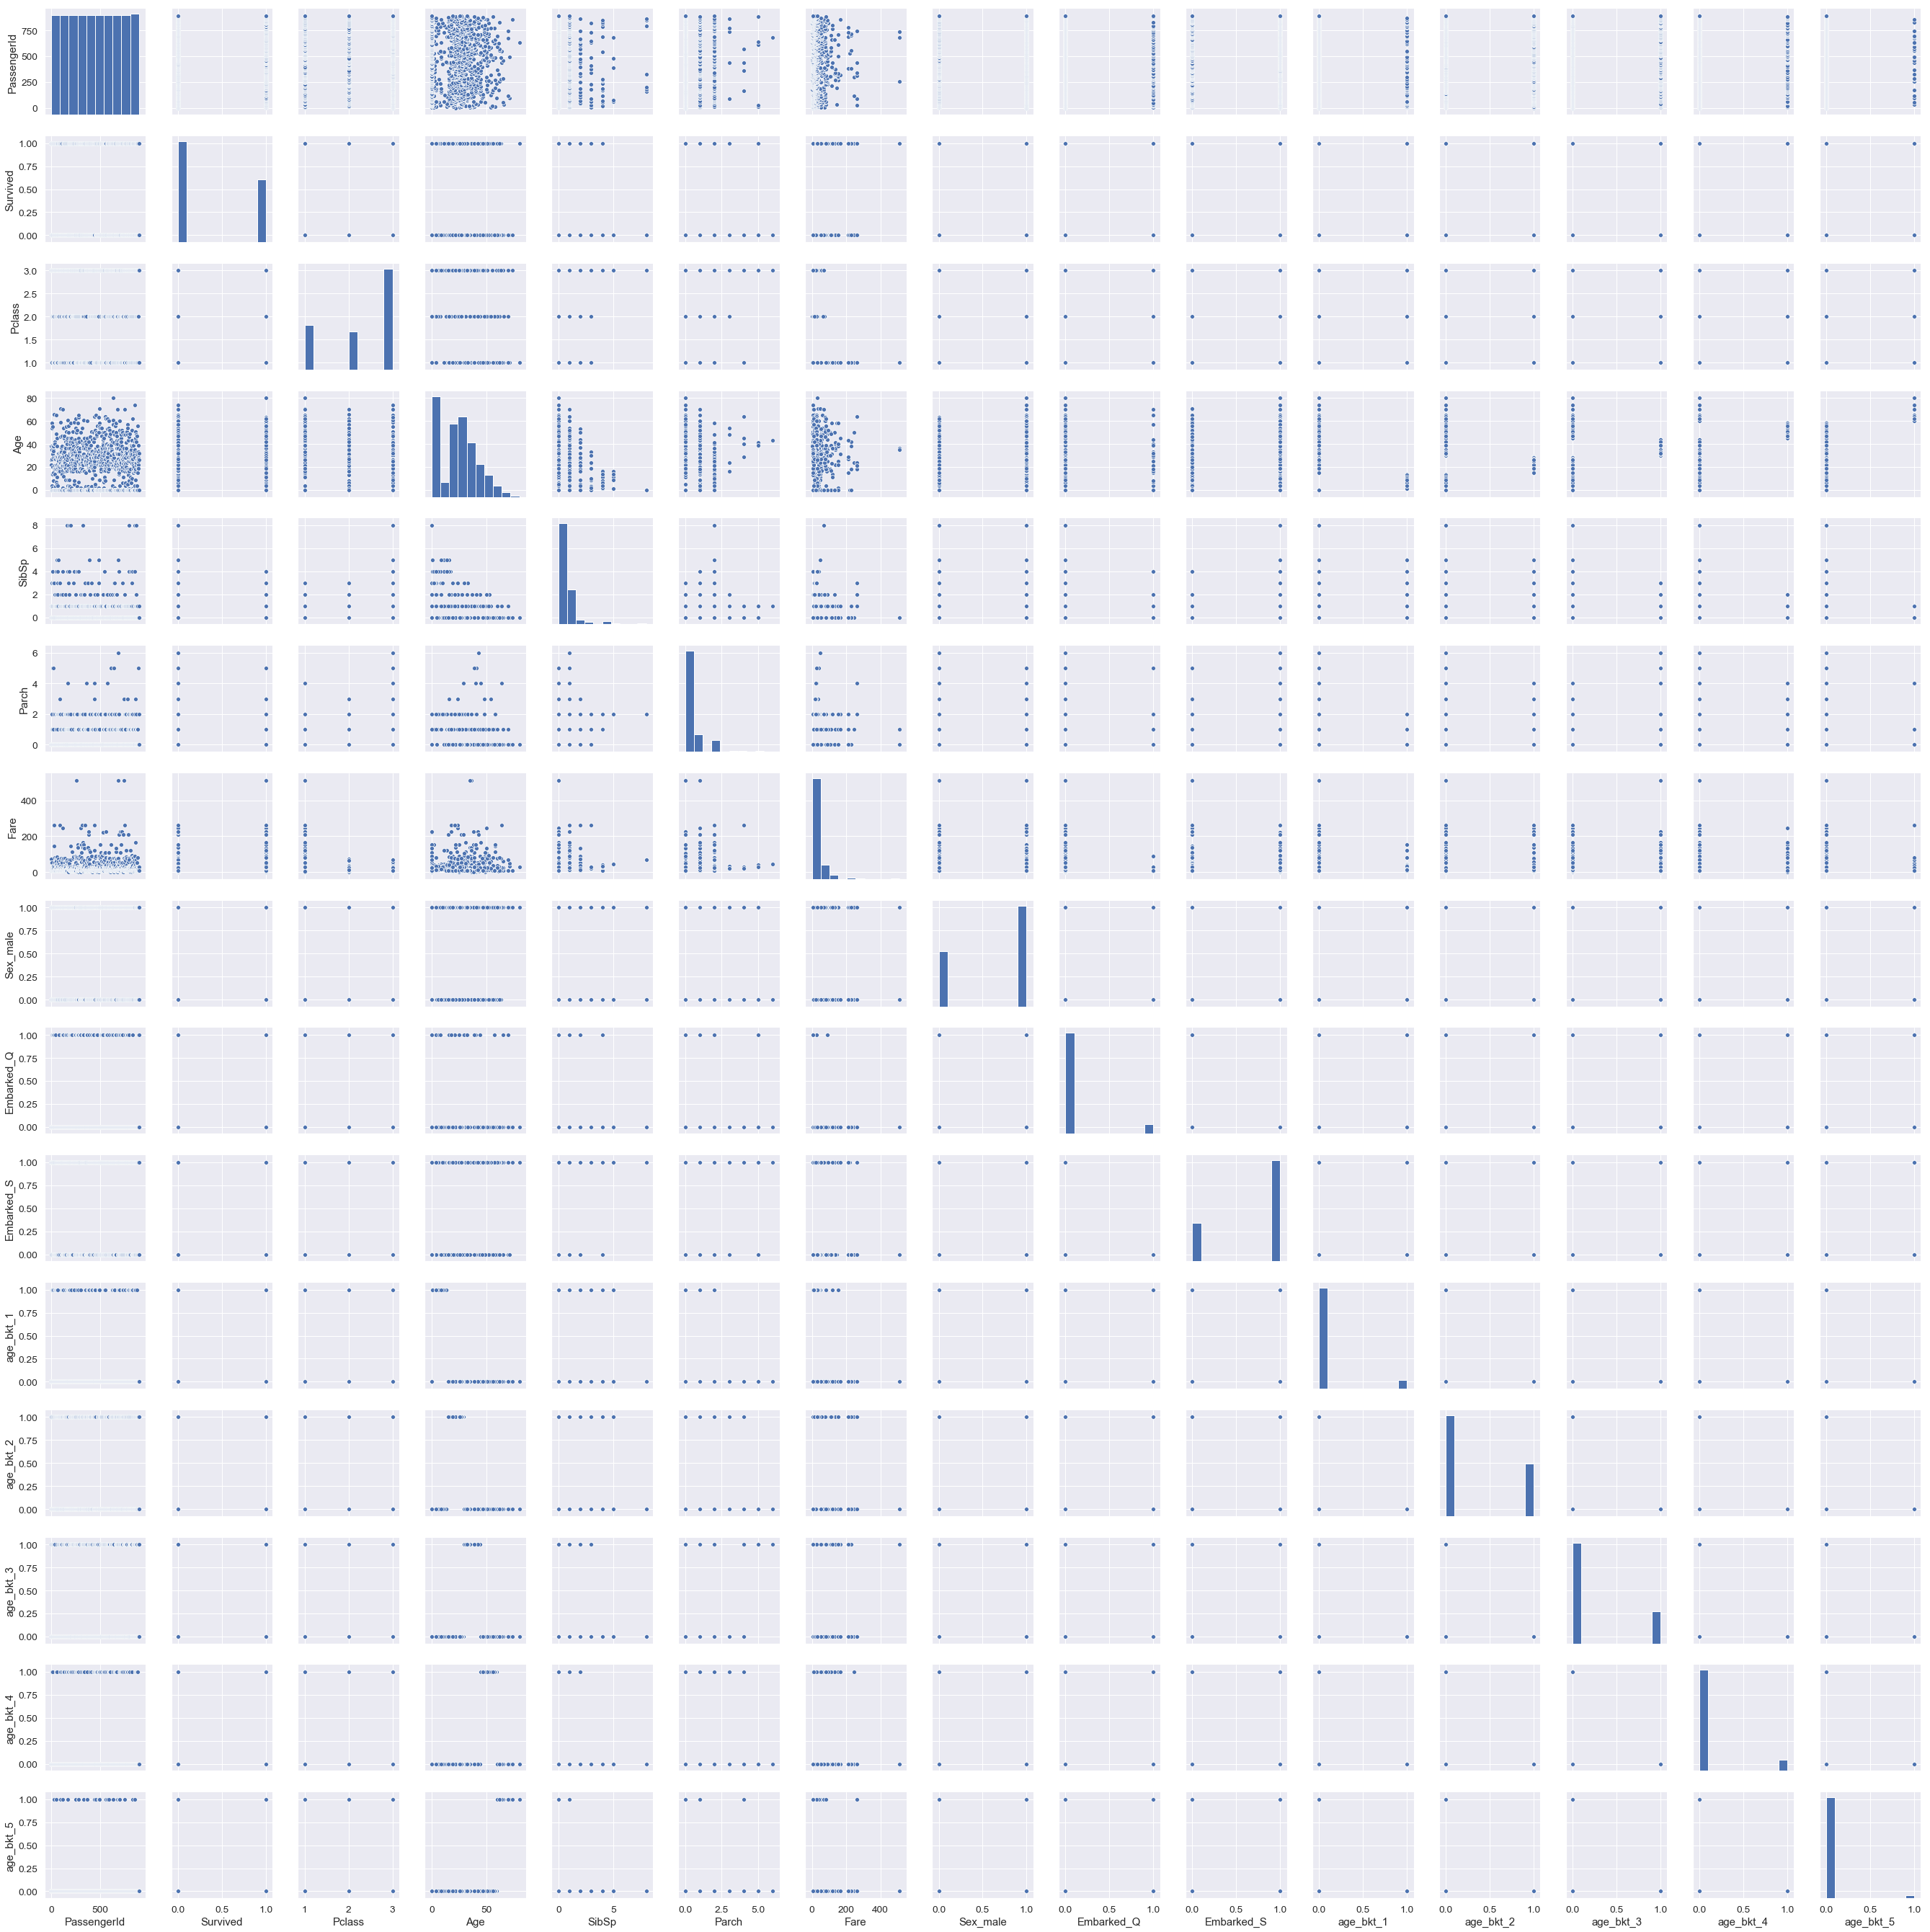

In [349]:
sns.pairplot(new_df)

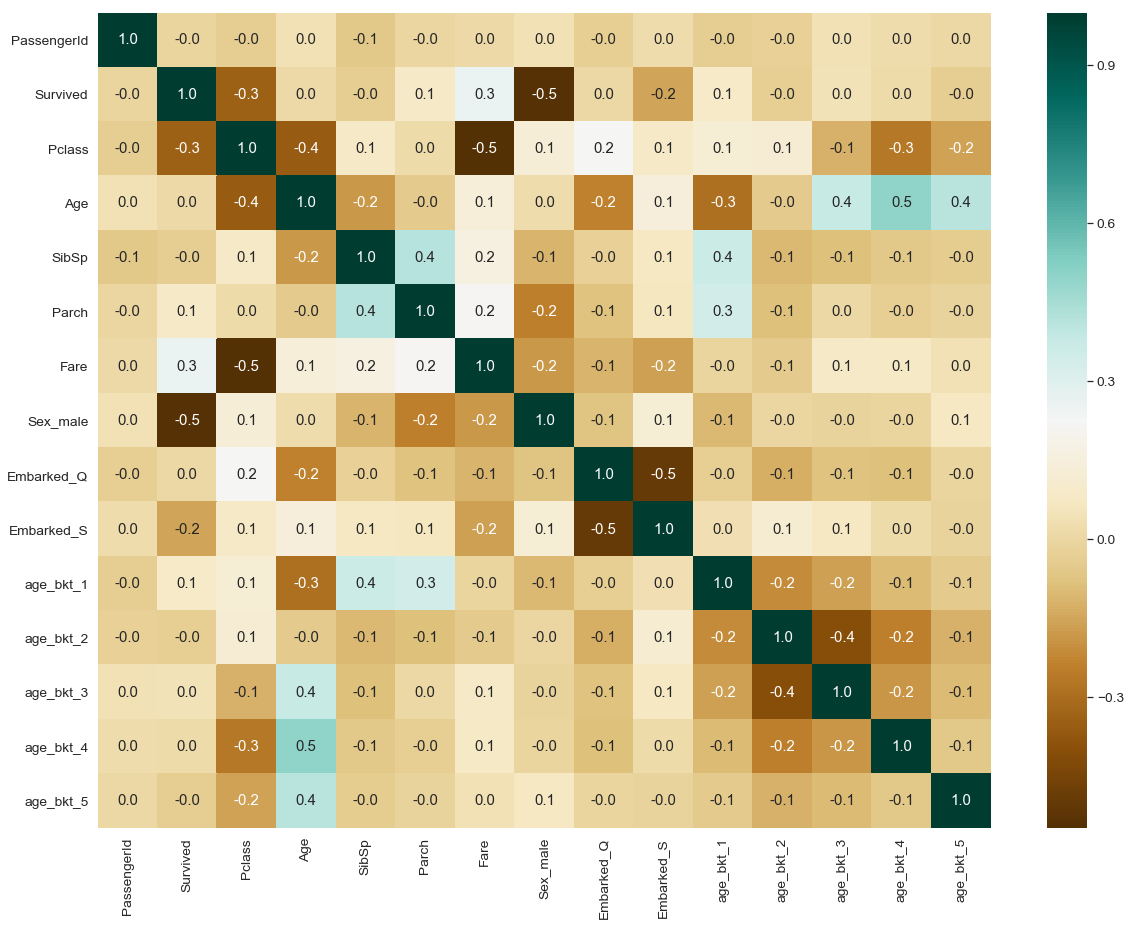

In [350]:
corr = new_df.corr()
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(new_df.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()

In [351]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_male       891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
age_bkt_1      891 non-null uint8
age_bkt_2      891 non-null uint8
age_bkt_3      891 non-null uint8
age_bkt_4      891 non-null uint8
age_bkt_5      891 non-null uint8
dtypes: float64(1), int32(1), int64(5), uint8(8)
memory usage: 52.3 KB


In [352]:
df.drop(['Age'],axis=1,inplace=True)

In [354]:
import numpy as np 
#new_df=new_df.dropna(axis=0)

In [355]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_male       891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
age_bkt_1      891 non-null uint8
age_bkt_2      891 non-null uint8
age_bkt_3      891 non-null uint8
age_bkt_4      891 non-null uint8
age_bkt_5      891 non-null uint8
dtypes: float64(1), int32(1), int64(5), uint8(8)
memory usage: 52.3 KB


In [356]:
new_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,age_bkt_1,age_bkt_2,age_bkt_3,age_bkt_4,age_bkt_5
0,1,0,3,22,1,0,7,1,0,1,0,1,0,0,0
1,2,1,1,38,1,0,71,0,0,0,0,0,1,0,0
2,3,1,3,26,0,0,8,0,0,1,0,1,0,0,0
3,4,1,1,35,1,0,53,0,0,1,0,0,1,0,0
4,5,0,3,35,0,0,8,1,0,1,0,0,1,0,0


In [357]:
x_train=new_df.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14]]
y_train=new_df.iloc[:,1]

In [358]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [359]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_male       891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
age_bkt_1      891 non-null uint8
age_bkt_2      891 non-null uint8
age_bkt_3      891 non-null uint8
age_bkt_4      891 non-null uint8
age_bkt_5      891 non-null uint8
dtypes: float64(1), int32(1), int64(4), uint8(8)
memory usage: 45.3 KB


In [360]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 30,
                             min_samples_leaf = 10,
                             max_depth = 50)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [362]:
pred_y_train=clf.predict(x_train)
pred_y_train

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,

In [363]:
## Let us see the classification accuracy of our model
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
score = accuracy_score(y_train, pred_y_train)
score

0.8552188552188552

In [365]:
1- sum(y_train)/891

0.6161616161616161

In [366]:
y_train_prob = clf.predict_proba(x_train)
## AUC
fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
auc(fpr, tpr)

0.9277980165958307

In [367]:
df=pd.read_csv('test.csv')

In [368]:
#df.drop(['PassengerId'],axis=1,inplace=True)

In [369]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [370]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34,0,0,8,Q
1,893,3,female,47,1,0,7,S
2,894,2,male,62,0,0,10,Q
3,895,3,male,27,0,0,9,S
4,896,3,female,22,1,1,12,S


In [371]:
#df.drop(['PassengerId'],axis=1,inplace=True)
df['Age']=df['Age'].fillna(0.0).astype(int)
df['age_bkt']=df['Age'].apply(lambda x: "0" if x==0 else ("1" if x<15 else ("2" if x<30 else ("3" if x<45 else ("4" if x<60 else "5"))))) 

In [372]:
new_df = pd.get_dummies(df,drop_first=True)

In [373]:
new_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,age_bkt_1,age_bkt_2,age_bkt_3,age_bkt_4,age_bkt_5
0,892,3,34,0,0,8,1,1,0,0,0,1,0,0
1,893,3,47,1,0,7,0,0,1,0,0,0,1,0
2,894,2,62,0,0,10,1,1,0,0,0,0,0,1
3,895,3,27,0,0,9,1,0,1,0,1,0,0,0
4,896,3,22,1,1,12,0,0,1,0,1,0,0,0


In [374]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Sex_male       418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
age_bkt_1      418 non-null uint8
age_bkt_2      418 non-null uint8
age_bkt_3      418 non-null uint8
age_bkt_4      418 non-null uint8
age_bkt_5      418 non-null uint8
dtypes: float64(1), int32(1), int64(4), uint8(8)
memory usage: 21.3 KB


In [375]:
new_df['Fare'].mean()

35.6271884892086

In [376]:
new_df['Fare']=new_df['Fare'].apply(lambda x: 36 if pd.isnull(x) else x)

In [300]:
import numpy as np 
new_df=new_df.dropna(axis=0)

In [377]:
x_test=new_df.iloc[:,0:]


In [378]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [379]:
x_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,age_bkt_1,age_bkt_2,age_bkt_3,age_bkt_4,age_bkt_5
0,892,3,34,0,0,8,1,1,0,0,0,1,0,0
1,893,3,47,1,0,7,0,0,1,0,0,0,1,0
2,894,2,62,0,0,10,1,1,0,0,0,0,0,1
3,895,3,27,0,0,9,1,0,1,0,1,0,0,0
4,896,3,22,1,1,12,0,0,1,0,1,0,0,0


In [380]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 30,
                             min_samples_leaf = 10,
                             max_depth = 50)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [381]:
y_pred_decision_tree = clf.predict(x_test)
y_pred_decision_tree

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [382]:
submission = pd.DataFrame({
        "PassengerId": x_test["PassengerId"],
        "Survived": y_pred_decision_tree
    })

In [383]:
submission.to_csv(r'submission.csv',index=False)